In [1]:
###importaciones
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import category_encoders
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import joblib

In [3]:
##lectura del csv y objetos a usar
data=pd.read_csv('Prepintado.csv')
le=LabelEncoder()
dt=DecisionTreeClassifier()
data

,Estatus,FECHA_ALTA,IdMaterial,NECESIDAD_ORIGEN,ACEROOrigen,NECESIDAD_DESTINO,ACERODestino,PRO_ORIGEN,PRO_DESTINO,CCLASEPRODTOOrigen,...,SELLODestino,SUPERFICIEDestino,SUSTRATORECUBRDestino,SUSTRATODestino,SUSTTRATC_INFDestino,SUSTTRATC_SUPDestino,TIPOPOLIETDestino,USOGRALDestino,Reasignacion,Pedido
0,OK,29-08-2017 15:51:04,1A205565UG402,3001536778,C071TM,3001571150,NaN,MP517321,MP517321,M-P-PREPINTADO-BOB-_,...,NO,EXPUESTA,G40,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,SIN POLIETILENO,LINEA BLANCA,OK,1
1,Rechazado,05-07-2016 16:09:00,2A364297UP200,3000922604,7102,3001127226,NaN,MP518012,MP518012,M-P-PREPINTADO-BOB-_,...,NO,SEMI-EXPUESTA,G60,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,POLIETILENO MEDIA ADHERENCIA,INDUSTRIAL,OK,1
2,OK,14-11-2016 16:28:48,1A144073UG400,3000980626,C071TM,3001251811,NaN,MP518012,MP518012,M-P-PREPINTADO-BOB-_,...,NO,SEMI-EXPUESTA,G60,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,POLIETILENO MEDIA ADHERENCIA,INDUSTRIAL,OK,1
3,OK,17-01-2017 10:42:37,2A414785JG201,3001339259,7061,3001249992,NaN,MP518012,MP518012,M-P-PREPINTADO-BOB-_,...,NO,SEMI-EXPUESTA,G60,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,POLIETILENO MEDIA ADHERENCIA,INDUSTRIAL,OK,1
4,OK,07-07-2016 11:39:21,1A121353UG400,3000789855,C091TM,3001033124,NaN,MP518012,MP518012,M-P-PREPINTADO-BOB-_,...,NO,SEMI-EXPUESTA,G60,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,POLIETILENO MEDIA ADHERENCIA,INDUSTRIAL,OK,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18203,OK,03-10-2017 11:35:12,3A683251UG400,3001580617,C071TM,3001581676,NaN,MP533322,MP532980,M-P-PREPINTADO-BOB-_,...,NO,EXPUESTA,G40,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,BAJA ADH 100INI/100FIN QCUST,LINEA BLANCA,OK,1
18204,OK,03-10-2017 13:06:12,2A504055UG401,3001536888,2060,3001419118,NaN,MP533322,MP532980,M-P-PREPINTADO-BOB-_,...,NO,EXPUESTA,G40,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,BAJA ADH 100INI/100FIN QCUST,LINEA BLANCA,OK,1
18205,OK,13-07-2017 17:12:54,2A475910UG400,3001477197,7061,2000682302,NaN,MP533512,MP533489,M-P-PREPINTADO-BOB-_,...,NO,INTERNA,G60,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,SIN POLIETILENO,COMERCIAL Y CONSTRUCCION,OK,1
18206,OK,28-09-2017 15:27:09,1A220727UG400,3001551161,C071TM,3001543282,NaN,MP533835,MP531472,M-P-PREPINTADO-BOB-_,...,NO,EXPUESTA,G40,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,POLIETILENO BAJA ADHERENCIA,LINEA BLANCA,OK,1


In [4]:
###limpieza de datos
de=['Estatus', 'FECHA_ALTA', 'IdMaterial', 'NECESIDAD_ORIGEN','NECESIDAD_DESTINO', 'PRO_ORIGEN', 'PRO_DESTINO', 'Pedido','ACERODestino','ACEROOrigen']
datac=data.drop(de,axis=1)
datac

,CCLASEPRODTOOrigen,CARAINSPECCIONOrigen,COLORCARA_INF_Origen,COLORCARA_SUP_Origen,DIAM__INTERNOOrigen,ESQUEMAPINTADOOrigen,EXTREMOSOrigen,NORMAOrigen,NORPREPINTADOOrigen,NORTOLANCHOOrigen,...,PLANITUDDestino,SELLODestino,SUPERFICIEDestino,SUSTRATORECUBRDestino,SUSTRATODestino,SUSTTRATC_INFDestino,SUSTTRATC_SUPDestino,TIPOPOLIETDestino,USOGRALDestino,Reasignacion
0,M-P-PREPINTADO-BOB-_,SUPERIOR,0023-CLEAR EPOXICO P/ESPUMA,0151-BLANCO FRIO,508,ACABADO / CLEAR (AC+PR|CL),CORTADOS 98% EN ESPESOR,ASTM A 653 \ CS TIPO B (V 2008 REV 0),TERPNT,TERNIUM -0.0/+5.0 MM,...,NIVEL 1 / 15 UI / 3MM,NO,EXPUESTA,G40,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,SIN POLIETILENO,LINEA BLANCA,OK
1,M-P-PREPINTADO-BOB-_,SUPERIOR,0028-CLEAR P/ESPUMA,0405-TAUPE METALLIC,508,ACABADO / CLEAR (AC+PR|CL),CORTADOS 98% EN ESPESOR,ASTM A 653 \ CS TIPO B (V 2008 REV 0),TERPNT,ASTM A 924,...,NIVEL 1 / 15 UI / 3MM,NO,SEMI-EXPUESTA,G60,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,POLIETILENO MEDIA ADHERENCIA,INDUSTRIAL,OK
2,M-P-PREPINTADO-BOB-_,SUPERIOR,0028-CLEAR P/ESPUMA,0405-TAUPE METALLIC,508,ACABADO / CLEAR (AC+PR|CL),CORTADOS 98% EN ESPESOR,ASTM A 653 \ CS TIPO B (V 2008 REV 0),TERPNT,ASTM A 924,...,NIVEL 1 / 15 UI / 3MM,NO,SEMI-EXPUESTA,G60,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,POLIETILENO MEDIA ADHERENCIA,INDUSTRIAL,OK
3,M-P-PREPINTADO-BOB-_,SUPERIOR,0028-CLEAR P/ESPUMA,0405-TAUPE METALLIC,508,ACABADO / CLEAR (AC+PR|CL),CORTADOS 98% EN ESPESOR,ASTM A 653 \ CS TIPO B (V 2008 REV 0),TERPNT,ASTM A 924,...,NIVEL 1 / 15 UI / 3MM,NO,SEMI-EXPUESTA,G60,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,POLIETILENO MEDIA ADHERENCIA,INDUSTRIAL,OK
4,M-P-PREPINTADO-BOB-_,SUPERIOR,0028-CLEAR P/ESPUMA,0405-TAUPE METALLIC,508,ACABADO / CLEAR (AC+PR|CL),CORTADOS 98% EN ESPESOR,ASTM A 653 \ CS TIPO B (V 2008 REV 0),TERPNT,ASTM A 924,...,NIVEL 1 / 15 UI / 3MM,NO,SEMI-EXPUESTA,G60,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,POLIETILENO MEDIA ADHERENCIA,INDUSTRIAL,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18203,M-P-PREPINTADO-BOB-_,SUPERIOR,0024-CLEAR LAUNDRY BACKER,0488-DIAMOND GRAY LAV,508,ACABADO / CLEAR (CL+AC|PR+CL),CORTADOS 98% EN ESPESOR,ASTM A 653 \ FS TIPO B (V 2008 REV 0),TERPNT,ASTM A 924,...,NIVEL 1 / 15 UI / 3MM,NO,EXPUESTA,G40,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,BAJA ADH 100INI/100FIN QCUST,LINEA BLANCA,OK
18204,M-P-PREPINTADO-BOB-_,SUPERIOR,0024-CLEAR LAUNDRY BACKER,0488-DIAMOND GRAY LAV,508,ACABADO / CLEAR (CL+AC|PR+CL),CORTADOS 98% EN ESPESOR,ASTM A 653 \ FS TIPO B (V 2008 REV 0),TERPNT,ASTM A 924,...,NIVEL 1 / 15 UI / 3MM,NO,EXPUESTA,G40,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,BAJA ADH 100INI/100FIN QCUST,LINEA BLANCA,OK
18205,M-P-PREPINTADO-BOB-_,SUPERIOR,0400-GRIS FONDO,0208-DURAPLUS AZUL RAL 5005,508,ACABADO / FONDO (AC+PR|PR+AC),CORTADOS 98% EN ESPESOR,ASTM A 653 \ SS 33 (V 2008 REV 0),TERPNT,ASTM A 924,...,NIVEL 3 / 29 UI / 4MM,NO,INTERNA,G60,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,SIN POLIETILENO,COMERCIAL Y CONSTRUCCION,OK
18206,M-P-PREPINTADO-BOB-_,SUPERIOR,0028-CLEAR P/ESPUMA,0709-BISQUET SUPERMATIC,508,ACABADO / CLEAR (AC+PR|CL),CORTADOS 98% EN ESPESOR,ASTM A 653 \ CS TIPO B (V 2008 REV 0),TERPNT,ASTM A 924,...,NIVEL 1 / 15 UI / 3MM,NO,EXPUESTA,G40,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,POLIETILENO BAJA ADHERENCIA,LINEA BLANCA,OK


In [5]:
main_df=datac
main_df=pd.DataFrame(data=main_df)
full_df=datac
full_df=pd.DataFrame(data=full_df)
print(full_df.head(10))

     CCLASEPRODTOOrigen CARAINSPECCIONOrigen         COLORCARA_INF_Origen  \
0  M-P-PREPINTADO-BOB-_             SUPERIOR  0023-CLEAR EPOXICO P/ESPUMA   
1  M-P-PREPINTADO-BOB-_             SUPERIOR          0028-CLEAR P/ESPUMA   
2  M-P-PREPINTADO-BOB-_             SUPERIOR          0028-CLEAR P/ESPUMA   
3  M-P-PREPINTADO-BOB-_             SUPERIOR          0028-CLEAR P/ESPUMA   
4  M-P-PREPINTADO-BOB-_             SUPERIOR          0028-CLEAR P/ESPUMA   
5  M-P-PREPINTADO-BOB-_             SUPERIOR          0028-CLEAR P/ESPUMA   
6  M-P-PREPINTADO-BOB-_             SUPERIOR          0028-CLEAR P/ESPUMA   
7  M-P-PREPINTADO-BOB-_             SUPERIOR          0028-CLEAR P/ESPUMA   
8  M-P-PREPINTADO-BOB-_             SUPERIOR          0028-CLEAR P/ESPUMA   
9  M-P-PREPINTADO-BOB-_             SUPERIOR          0028-CLEAR P/ESPUMA   

  COLORCARA_SUP_Origen  DIAM__INTERNOOrigen        ESQUEMAPINTADOOrigen  \
0     0151-BLANCO FRIO                  508  ACABADO / CLEAR (AC+PR|CL)   
1 

In [6]:
 ###codificación de variable objetivo usando LE
main_df.Reasignacion=le.fit_transform(main_df['Reasignacion'])
main_df

,CCLASEPRODTOOrigen,CARAINSPECCIONOrigen,COLORCARA_INF_Origen,COLORCARA_SUP_Origen,DIAM__INTERNOOrigen,ESQUEMAPINTADOOrigen,EXTREMOSOrigen,NORMAOrigen,NORPREPINTADOOrigen,NORTOLANCHOOrigen,...,PLANITUDDestino,SELLODestino,SUPERFICIEDestino,SUSTRATORECUBRDestino,SUSTRATODestino,SUSTTRATC_INFDestino,SUSTTRATC_SUPDestino,TIPOPOLIETDestino,USOGRALDestino,Reasignacion
0,M-P-PREPINTADO-BOB-_,SUPERIOR,0023-CLEAR EPOXICO P/ESPUMA,0151-BLANCO FRIO,508,ACABADO / CLEAR (AC+PR|CL),CORTADOS 98% EN ESPESOR,ASTM A 653 \ CS TIPO B (V 2008 REV 0),TERPNT,TERNIUM -0.0/+5.0 MM,...,NIVEL 1 / 15 UI / 3MM,NO,EXPUESTA,G40,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,SIN POLIETILENO,LINEA BLANCA,0
1,M-P-PREPINTADO-BOB-_,SUPERIOR,0028-CLEAR P/ESPUMA,0405-TAUPE METALLIC,508,ACABADO / CLEAR (AC+PR|CL),CORTADOS 98% EN ESPESOR,ASTM A 653 \ CS TIPO B (V 2008 REV 0),TERPNT,ASTM A 924,...,NIVEL 1 / 15 UI / 3MM,NO,SEMI-EXPUESTA,G60,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,POLIETILENO MEDIA ADHERENCIA,INDUSTRIAL,0
2,M-P-PREPINTADO-BOB-_,SUPERIOR,0028-CLEAR P/ESPUMA,0405-TAUPE METALLIC,508,ACABADO / CLEAR (AC+PR|CL),CORTADOS 98% EN ESPESOR,ASTM A 653 \ CS TIPO B (V 2008 REV 0),TERPNT,ASTM A 924,...,NIVEL 1 / 15 UI / 3MM,NO,SEMI-EXPUESTA,G60,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,POLIETILENO MEDIA ADHERENCIA,INDUSTRIAL,0
3,M-P-PREPINTADO-BOB-_,SUPERIOR,0028-CLEAR P/ESPUMA,0405-TAUPE METALLIC,508,ACABADO / CLEAR (AC+PR|CL),CORTADOS 98% EN ESPESOR,ASTM A 653 \ CS TIPO B (V 2008 REV 0),TERPNT,ASTM A 924,...,NIVEL 1 / 15 UI / 3MM,NO,SEMI-EXPUESTA,G60,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,POLIETILENO MEDIA ADHERENCIA,INDUSTRIAL,0
4,M-P-PREPINTADO-BOB-_,SUPERIOR,0028-CLEAR P/ESPUMA,0405-TAUPE METALLIC,508,ACABADO / CLEAR (AC+PR|CL),CORTADOS 98% EN ESPESOR,ASTM A 653 \ CS TIPO B (V 2008 REV 0),TERPNT,ASTM A 924,...,NIVEL 1 / 15 UI / 3MM,NO,SEMI-EXPUESTA,G60,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,POLIETILENO MEDIA ADHERENCIA,INDUSTRIAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18203,M-P-PREPINTADO-BOB-_,SUPERIOR,0024-CLEAR LAUNDRY BACKER,0488-DIAMOND GRAY LAV,508,ACABADO / CLEAR (CL+AC|PR+CL),CORTADOS 98% EN ESPESOR,ASTM A 653 \ FS TIPO B (V 2008 REV 0),TERPNT,ASTM A 924,...,NIVEL 1 / 15 UI / 3MM,NO,EXPUESTA,G40,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,BAJA ADH 100INI/100FIN QCUST,LINEA BLANCA,0
18204,M-P-PREPINTADO-BOB-_,SUPERIOR,0024-CLEAR LAUNDRY BACKER,0488-DIAMOND GRAY LAV,508,ACABADO / CLEAR (CL+AC|PR+CL),CORTADOS 98% EN ESPESOR,ASTM A 653 \ FS TIPO B (V 2008 REV 0),TERPNT,ASTM A 924,...,NIVEL 1 / 15 UI / 3MM,NO,EXPUESTA,G40,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,BAJA ADH 100INI/100FIN QCUST,LINEA BLANCA,0
18205,M-P-PREPINTADO-BOB-_,SUPERIOR,0400-GRIS FONDO,0208-DURAPLUS AZUL RAL 5005,508,ACABADO / FONDO (AC+PR|PR+AC),CORTADOS 98% EN ESPESOR,ASTM A 653 \ SS 33 (V 2008 REV 0),TERPNT,ASTM A 924,...,NIVEL 3 / 29 UI / 4MM,NO,INTERNA,G60,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,SIN POLIETILENO,COMERCIAL Y CONSTRUCCION,0
18206,M-P-PREPINTADO-BOB-_,SUPERIOR,0028-CLEAR P/ESPUMA,0709-BISQUET SUPERMATIC,508,ACABADO / CLEAR (AC+PR|CL),CORTADOS 98% EN ESPESOR,ASTM A 653 \ CS TIPO B (V 2008 REV 0),TERPNT,ASTM A 924,...,NIVEL 1 / 15 UI / 3MM,NO,EXPUESTA,G40,GALVANIZADO MINIMA FLOR,ESTANDAR,ESTANDAR,POLIETILENO BAJA ADHERENCIA,LINEA BLANCA,0


In [7]:
###Variable objetivo
target_df = pd.DataFrame(main_df, columns=['Reasignacion'])
print(target_df.sample(10))

       Reasignacion
4409              0
12573             0
9306              0
17719             1
12567             0
16426             0
355               0
3682              0
3152              0
1632              0


In [8]:
main_df.columns

Index(['CCLASEPRODTOOrigen', 'CARAINSPECCIONOrigen', 'COLORCARA_INF_Origen',
       'COLORCARA_SUP_Origen', 'DIAM__INTERNOOrigen', 'ESQUEMAPINTADOOrigen',
       'EXTREMOSOrigen', 'NORMAOrigen', 'NORPREPINTADOOrigen',
       'NORTOLANCHOOrigen', 'NORTOLESPESOROrigen', 'PINT_C_INF_Origen',
       'PINT_C_SUP_Origen', 'PLANITUDOrigen', 'SELLOOrigen',
       'SUPERFICIEOrigen', 'SUSTRATOOrigen', 'SUSTRATORECUBROrigen',
       'SUSTTRATC_INFOrigen', 'SUSTTRATC_SUPOrigen', 'TIPOPOLIETOrigen',
       'USOGRALOrigen', 'CCLASEPRODTODestino', 'CARAINSPECCIONDestino',
       'COLORCARA_INF_Destino', 'COLORCARA_SUP_Destino',
       'DIAM__INTERNODestino', 'ESQUEMAPINTADODestino', 'EXTREMOSDestino',
       'NORMADestino', 'NORPREPINTADODestino', 'NORTOLANCHODestino',
       'NORTOLESPESORDestino', 'PINT_C_INF_Destino', 'PINT_C_SUP_Destino',
       'PLANITUDDestino', 'SELLODestino', 'SUPERFICIEDestino',
       'SUSTRATORECUBRDestino', 'SUSTRATODestino', 'SUSTTRATC_INFDestino',
       'SUSTTRATC_SUP

In [9]:
main_df=main_df.drop(['Reasignacion'],axis=1)

In [10]:
####encodifiación de atributos usando target
main_df.columns = main_df.columns.str.strip()
target_df.columns = target_df.columns.str.strip()
enc=category_encoders.target_encoder.TargetEncoder(verbose=0,cols=['CCLASEPRODTOOrigen', 'CARAINSPECCIONOrigen',
       'COLORCARA_INF_Origen', 'COLORCARA_SUP_Origen', 'DIAM__INTERNOOrigen',
       'ESQUEMAPINTADOOrigen', 'EXTREMOSOrigen', 'NORMAOrigen',
       'NORPREPINTADOOrigen', 'NORTOLANCHOOrigen', 'NORTOLESPESOROrigen',
       'PINT_C_INF_Origen', 'PINT_C_SUP_Origen', 'PLANITUDOrigen',
       'SELLOOrigen', 'SUPERFICIEOrigen', 'SUSTRATOOrigen',
       'SUSTRATORECUBROrigen', 'SUSTTRATC_INFOrigen', 'SUSTTRATC_SUPOrigen',
       'TIPOPOLIETOrigen', 'USOGRALOrigen', 'CCLASEPRODTODestino',
       'CARAINSPECCIONDestino', 'COLORCARA_INF_Destino',
       'COLORCARA_SUP_Destino', 'DIAM__INTERNODestino',
       'ESQUEMAPINTADODestino', 'EXTREMOSDestino', 'NORMADestino',
       'NORPREPINTADODestino', 'NORTOLANCHODestino', 'NORTOLESPESORDestino',
       'PINT_C_INF_Destino', 'PINT_C_SUP_Destino', 'PLANITUDDestino',
       'SELLODestino', 'SUPERFICIEDestino', 'SUSTRATORECUBRDestino',
       'SUSTRATODestino', 'SUSTTRATC_INFDestino', 'SUSTTRATC_SUPDestino',
       'TIPOPOLIETDestino', 'USOGRALDestino'],drop_invariant=False, return_df=True, handle_unknown='value',handle_missing='value',min_samples_leaf=1,smoothing=1.0).fit(main_df,target_df)

In [10]:
joblib.dump(enc,'TargetPrepintado.pkl')

['TargetPrepintado.pkl']

In [11]:
codi=enc.transform(main_df)
codi

,CCLASEPRODTOOrigen,CARAINSPECCIONOrigen,COLORCARA_INF_Origen,COLORCARA_SUP_Origen,DIAM__INTERNOOrigen,ESQUEMAPINTADOOrigen,EXTREMOSOrigen,NORMAOrigen,NORPREPINTADOOrigen,NORTOLANCHOOrigen,...,PINT_C_SUP_Destino,PLANITUDDestino,SELLODestino,SUPERFICIEDestino,SUSTRATORECUBRDestino,SUSTRATODestino,SUSTTRATC_INFDestino,SUSTTRATC_SUPDestino,TIPOPOLIETDestino,USOGRALDestino
0,0.077329,0.077329,0.005450,0.003344,0.077329,0.020389,0.077329,0.043976,0.077329,0.009218,...,0.013400,0.018017,0.077471,0.019237,0.079459,0.044141,0.076439,0.077057,0.087517,0.019269
1,0.077329,0.077329,0.018077,0.042969,0.077329,0.020389,0.077329,0.043976,0.077329,0.056926,...,0.043534,0.018017,0.077471,0.034267,0.043778,0.044141,0.076439,0.077057,0.040201,0.021759
2,0.077329,0.077329,0.018077,0.042969,0.077329,0.020389,0.077329,0.043976,0.077329,0.056926,...,0.043534,0.018017,0.077471,0.034267,0.043778,0.044141,0.076439,0.077057,0.040201,0.021759
3,0.077329,0.077329,0.018077,0.042969,0.077329,0.020389,0.077329,0.043976,0.077329,0.056926,...,0.043534,0.018017,0.077471,0.034267,0.043778,0.044141,0.076439,0.077057,0.040201,0.021759
4,0.077329,0.077329,0.018077,0.042969,0.077329,0.020389,0.077329,0.043976,0.077329,0.056926,...,0.043534,0.018017,0.077471,0.034267,0.043778,0.044141,0.076439,0.077057,0.040201,0.021759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18203,0.077329,0.077329,0.015831,0.000000,0.077329,0.028169,0.077329,0.026816,0.077329,0.056926,...,0.013400,0.018017,0.077471,0.019237,0.079459,0.044141,0.076439,0.077057,0.059442,0.019269
18204,0.077329,0.077329,0.015831,0.000000,0.077329,0.028169,0.077329,0.026816,0.077329,0.056926,...,0.013400,0.018017,0.077471,0.019237,0.079459,0.044141,0.076439,0.077057,0.059442,0.019269
18205,0.077329,0.077329,0.124054,0.077329,0.077329,0.089954,0.077329,0.139806,0.077329,0.056926,...,0.009434,0.139730,0.077471,0.150971,0.043778,0.044141,0.076439,0.077057,0.087517,0.150174
18206,0.077329,0.077329,0.018077,0.047619,0.077329,0.020389,0.077329,0.043976,0.077329,0.056926,...,0.013400,0.018017,0.077471,0.019237,0.079459,0.044141,0.076439,0.077057,0.042969,0.019269


In [12]:
###declaración de variable x (atributos)
X=codi
X

,CCLASEPRODTOOrigen,CARAINSPECCIONOrigen,COLORCARA_INF_Origen,COLORCARA_SUP_Origen,DIAM__INTERNOOrigen,ESQUEMAPINTADOOrigen,EXTREMOSOrigen,NORMAOrigen,NORPREPINTADOOrigen,NORTOLANCHOOrigen,...,PINT_C_SUP_Destino,PLANITUDDestino,SELLODestino,SUPERFICIEDestino,SUSTRATORECUBRDestino,SUSTRATODestino,SUSTTRATC_INFDestino,SUSTTRATC_SUPDestino,TIPOPOLIETDestino,USOGRALDestino
0,0.077329,0.077329,0.005450,0.003344,0.077329,0.020389,0.077329,0.043976,0.077329,0.009218,...,0.013400,0.018017,0.077471,0.019237,0.079459,0.044141,0.076439,0.077057,0.087517,0.019269
1,0.077329,0.077329,0.018077,0.042969,0.077329,0.020389,0.077329,0.043976,0.077329,0.056926,...,0.043534,0.018017,0.077471,0.034267,0.043778,0.044141,0.076439,0.077057,0.040201,0.021759
2,0.077329,0.077329,0.018077,0.042969,0.077329,0.020389,0.077329,0.043976,0.077329,0.056926,...,0.043534,0.018017,0.077471,0.034267,0.043778,0.044141,0.076439,0.077057,0.040201,0.021759
3,0.077329,0.077329,0.018077,0.042969,0.077329,0.020389,0.077329,0.043976,0.077329,0.056926,...,0.043534,0.018017,0.077471,0.034267,0.043778,0.044141,0.076439,0.077057,0.040201,0.021759
4,0.077329,0.077329,0.018077,0.042969,0.077329,0.020389,0.077329,0.043976,0.077329,0.056926,...,0.043534,0.018017,0.077471,0.034267,0.043778,0.044141,0.076439,0.077057,0.040201,0.021759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18203,0.077329,0.077329,0.015831,0.000000,0.077329,0.028169,0.077329,0.026816,0.077329,0.056926,...,0.013400,0.018017,0.077471,0.019237,0.079459,0.044141,0.076439,0.077057,0.059442,0.019269
18204,0.077329,0.077329,0.015831,0.000000,0.077329,0.028169,0.077329,0.026816,0.077329,0.056926,...,0.013400,0.018017,0.077471,0.019237,0.079459,0.044141,0.076439,0.077057,0.059442,0.019269
18205,0.077329,0.077329,0.124054,0.077329,0.077329,0.089954,0.077329,0.139806,0.077329,0.056926,...,0.009434,0.139730,0.077471,0.150971,0.043778,0.044141,0.076439,0.077057,0.087517,0.150174
18206,0.077329,0.077329,0.018077,0.047619,0.077329,0.020389,0.077329,0.043976,0.077329,0.056926,...,0.013400,0.018017,0.077471,0.019237,0.079459,0.044141,0.076439,0.077057,0.042969,0.019269


In [13]:
###declaración de y (objetivo)
y=target_df
y

,Reasignacion
0,0
1,0
2,0
3,0
4,0
...,...
18203,0
18204,0
18205,0
18206,0


In [14]:
##división de datos 
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [15]:
##entrenamiento
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
###prueba score
dt.score(X_test,y_test)

0.9532073813708261

In [22]:
joblib.dump(dt,'ModeloPrepintado.pkl')

['ModeloPrepintado.pkl']

In [17]:
nombres=['OK','RECHAZADO']

In [18]:
##exportación y render
dot_data=export_graphviz(dt,feature_names= X.columns, class_names=nombres, impurity=False, filled=True)
graph=graphviz.Source(dot_data)
graph.render('ModeloPrepintado')

'ModeloPrepintado.pdf'

Text(0.5, 0, 'Importancia')

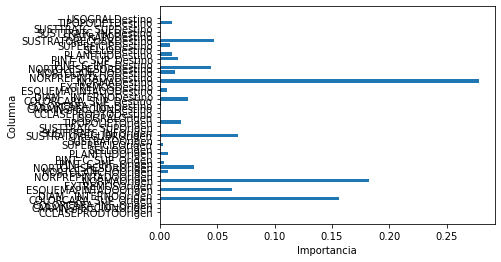

In [26]:
carac=main_df.shape[1]
plt.barh(range(carac),dt.feature_importances_)
plt.yticks(np.arange(carac),X.columns)
plt.ylabel('Columna')
plt.xlabel('Importancia')

<BarContainer object of 44 artists>